# Exercise Numpy/Scipy

### 1. Basics
1. generate a 1-vector of size 10
2. generate a zero-matrix of size 4x3
3. generate a 3x3 identity matrix
4. contruct a vector of length 100 with alternating ones and zeros ( hint: use slice indexing )
5. construct a 8x8 matrix with a checkboard pattern of zeros and ones
6. create a random vector of size 100 and sort it
7. compute the inverse, eigenvectors and eigenvalues of the following matrix:
$$\mathbf{A} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right]
$$


In [48]:
import numpy as np
import scipy as sp

In [127]:
a = np.array(range(10))
a
A = np.zeros((4,3))
A
Id = np.identity(3)
Id
alter = np.ones(100)
alter[::2] = 0
alter
B = np.zeros((8,8))
B[::2,::2] =1
B[1::2,1::2] = 1
B
rndv = np.random.rand(100)
rndv = np.sort(rndv)

C = np.array( [[1,2,3], [4,5,6], [7,8,9]], float)
D = np.linalg.inv(C)
E = np.linalg.eig(C)
E[0]
E[1]
D
C[::,0]

array([ 1.,  4.,  7.])

2. Solving ordinary differential equations (ODEs) using scipy

Consider the following hypothetical reaction system which was first proposed by Alfred J. Lotka (Lotka-Voltera System):
$$ \begin{align} 
r1:& \;\; X \rightarrow 2 X \\ 
r2:& \;\; X + Y \rightarrow 2 Y \\
r3:& \;\; Y \rightarrow \varnothing 
\end{align} $$

1. set up the stoichiometric matrix of the system (this can be done without Python)
2. the rate of change of the species participating in a reaction system can be written as
$$ \frac {dS} {dt} = N \cdot v(S,p) $$
with the vector of species concentrations $S$, the stoichiometric matrix N and the vector of reaction velocities $v(S,p)$ ($p$ denotes a vector of parmameters)
define a function `dSdt( S, t )` which computes the rate of change for each species, given the vector of current species concentrations $S$ and the current time $t$. Assume that all reactions follow irreversible mass-action kinetics with parameters $k_1 = 1.5$, $k_2 = 0.8 $ and $k_3 = 0.9$, each equal to 
3. Use the scipy ODE integrator scipy.integrate.odeint to solve the reaction system numerically on the time interval $t \in [0, 30]$ using the following initial conditions: $X(0)= Y(0) = 1$

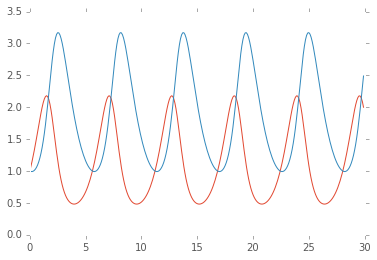

In [153]:
import scipy.integrate
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
k1 = 1.5
k2 = 0.8
k3 = 0.9
p = np.array([k1, k2, k3])
S0 = np.array([1,1])
N = np.array([[1,-1,0],[0,1,-1]], float)
time = np.arange(0,30,0.1)


def dSdt(S, t, p):
    q = np.array([S[0], S[0]*S[1], S[1]])
    v = p * q
    #v = np.array([k1*S[0], k2*S[0]*S[1], k3*S[1]])
    dS = np.dot(N, v) 
    return dS

result = scipy.integrate.odeint(dSdt, S0, time, args = (p,))

plt.plot(time, result)

### 3. Parameter fitting

You have been provided with an experimenal time-course measurement of the X and Y species (pickled object `experimental_data.p`). The data has the form of a numpy array with the first column representing the experimental time (in seconds), column 2 the measurement of X (in mM) and column 3 Y.

* modify the `dSdt` function from above, such that a parameter vector `p`$= [k1, k2, k3]$ can be passed in addition to `S` and `t`

* define an objective function `obj_fct( p, S_exp, t_exp )` which computes the squared distance between the experimental data and a model simulation for the parameters `p`$= [k1, k2, k3]$ for the time point vector `t_exp` (assume that the initial conditions are known and as defined above), (hint: additional arguments can be passed to the function integrated by `scipy.optimize.odeint` using the `args = (p,)` argument. Dont forget the comma in the tuple!

* try to identify the parameters of the reaction system using this objective function and the `sicipy.optimize.fmin` minimization algorithm. Fit only parameters k2 and k3 and keep k1 at 1.5. Use the parameters given above as starting values.

* plot a simulation of t

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 57
         Function evaluations: 113


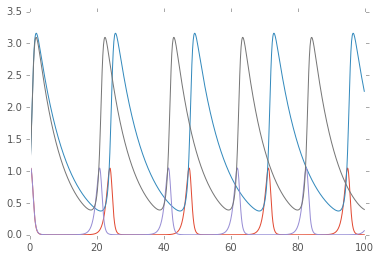

In [182]:
import pickle
import scipy.optimize

measurement = pickle.load(open('experimental_data.p', 'rb'))

t_exp = measurement[::,0]
S_exp = measurement[::,1:3]
S_exp[::,1]
p_guess = np.array([0.8,0.9])

def obj_fct( p_guess, S_exp, t_exp, k1 ):
    p = np.array([k1, p_guess[0],p_guess[1]])
    result = scipy.integrate.odeint(dSdt, S0, t_exp, args = (p, ))
    dist = sum((S_exp - result)**2)
    #dist0 = (S_exp[::,0] - result[0])**2
    #dist1 = (S_exp[::,1] - result[1])**2
    return sum(dist)


#test = obj_fct(p, S_exp, t_exp)
#test

hope = scipy.optimize.fmin(obj_fct, p_guess,args=(S_exp, t_exp, k1))
p = np.array([1.5, 1.15004434, 0.1200018])
result = scipy.integrate.odeint(dSdt, S0, t_exp, args = (p, ))
plt.plot(t_exp, result)
plt.plot(t_exp, S_exp)